In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Norm, Stan, Robust, log

D:\Softwares\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_w_lag.csv',header = 0)
features = ['Chl_current','Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_1m_lag'])
y = df["Chl_1m_lag"]

In [4]:
x.head()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,2.540000,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,3.759632,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,2.860000,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,3.692863,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,5.130000,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Chl_current',
 'Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [5]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler()
# transform data
x_norm = norm.fit_transform(x)

In [6]:
x_norm = pd.DataFrame(x_norm, columns = features)

In [7]:
x_norm.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000,3456.000000
mean,0.074862,0.235703,0.026262,0.290602,0.624921,0.650213,0.025829,0.031986,0.667563,0.601151,0.349778,0.261524,0.531637,0.699141
std,0.105363,0.130509,0.065576,0.068058,0.083805,0.179410,0.037839,0.069737,0.221799,0.217944,0.154471,0.207426,0.256537,0.329068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014085,0.161751,0.005076,0.254724,0.581427,0.518175,0.009063,0.011834,0.489877,0.423938,0.237768,0.090729,0.295139,0.630299
50%,0.038579,0.223844,0.005076,0.295078,0.630888,0.664932,0.016608,0.023361,0.689805,0.623056,0.334226,0.207020,0.564067,0.698453
75%,0.090631,0.285936,0.015976,0.331693,0.676985,0.801801,0.028061,0.035503,0.882140,0.805098,0.454000,0.397682,0.762688,0.992336
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
stan = StandardScaler()
# transform data
x_stan = stan.fit_transform(x)

In [9]:
x_stan = pd.DataFrame(x_stan, columns = features)

In [10]:
x_stan.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03,3.456000e+03
mean,1.856604e-15,2.914657e-16,3.580598e-16,3.809967e-17,5.075287e-15,-2.582811e-17,-1.836317e-17,-3.082347e-17,-4.998574e-17,-5.859510e-17,-7.452886e-18,-1.728620e-16,-9.926473e-17,9.091236e-16
std,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00,1.000145e+00
min,-7.106181e-01,-1.806287e+00,-4.005358e-01,-4.270529e+00,-7.457911e+00,-3.624701e+00,-6.826967e-01,-4.587399e-01,-3.010198e+00,-2.758680e+00,-2.264686e+00,-1.260990e+00,-2.072657e+00,-2.124919e+00
25%,-5.769221e-01,-5.667263e-01,-3.231165e-01,-5.272379e-01,-5.190680e-01,-7.360662e-01,-4.431352e-01,-2.890148e-01,-8.012274e-01,-8.132296e-01,-7.252240e-01,-8.235230e-01,-9.220188e-01,-2.092313e-01
50%,-3.444074e-01,-9.088734e-02,-3.231165e-01,6.577268e-02,7.121553e-02,8.205287e-02,-2.437169e-01,-1.237075e-01,1.002934e-01,1.005220e-01,-1.006905e-01,-2.628031e-01,1.264308e-01,-2.088320e-03
75%,1.496864e-01,3.849516e-01,-1.568726e-01,6.038504e-01,6.213437e-01,8.450505e-01,5.898925e-02,5.043530e-02,9.675792e-01,9.359095e-01,6.748029e-01,6.565130e-01,9.007828e-01,8.911173e-01
max,8.781795e+00,5.857100e+00,1.485106e+01,1.042493e+01,4.476257e+00,1.949935e+00,2.574892e+01,1.388303e+01,1.499036e+00,1.830315e+00,4.209961e+00,3.560707e+00,1.825975e+00,9.144109e-01


In [11]:
from sklearn.preprocessing import RobustScaler
robu = RobustScaler()
# transform data
x_robu = robu.fit_transform(x)

In [12]:
x_robu = pd.DataFrame(x_robu, columns = features)

In [13]:
x_robu.describe()

,Chl_current,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
count,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3.456000e+03,3456.000000,3456.000000,3.456000e+03,3456.000000
mean,0.473993,0.095502,1.943630,-0.058150,-6.244721e-02,-5.189551e-02,0.485372,3.644351e-01,-0.056701,-5.746940e-02,0.071920,0.177565,-6.936071e-02,0.001898
std,1.376456,1.050928,6.016130,0.884232,8.770032e-01,6.325559e-01,1.991826,2.946367e+00,0.565435,5.717926e-01,0.714375,0.675757,5.486854e-01,0.908934
min,-0.504000,-1.802500,-0.465697,-3.833743,-6.602113e+00,-2.344390e+00,-0.874245,-9.869855e-01,-1.758525,-1.634634e+00,-1.545682,-0.674434,-1.206433e+00,-1.929234
25%,-0.320000,-0.500000,0.000000,-0.524283,-5.176056e-01,-5.174312e-01,-0.397149,-4.869855e-01,-0.509677,-5.224007e-01,-0.446087,-0.378856,-5.751858e-01,-0.188252
50%,0.000000,0.000000,0.000000,0.000000,3.752857e-15,3.008661e-16,0.000000,-1.084202e-16,0.000000,3.929691e-16,0.000000,0.000000,1.402416e-16,0.000000
75%,0.680000,0.500000,1.000000,0.475717,4.823944e-01,4.825688e-01,0.602851,5.130145e-01,0.490323,4.775993e-01,0.553913,0.621144,4.248142e-01,0.811748
max,12.560000,6.250000,91.276628,9.158572,3.862676e+00,1.181369e+00,51.765321,4.126301e+01,0.790783,9.889398e-01,3.078978,2.583390,9.323801e-01,0.832917


In [14]:
# extract data from csv
# train_data = pd.read_csv('D:/PycharmProjects/pythonProject/train_data_w_lag.csv',header = 0)
# test_data = pd.read_csv('D:/PycharmProjects/pythonProject/test_data_w_lag.csv',header = 0)

In [6]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [331]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [237]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for max_depth in [3,5,7,10]:
        for learning_rate in [0.1,0.2,0.3]:
            for gamma in [0,5,10,20]:
                for reg_alpha in [5,10,15]:


                    XGBR = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth,
                                       learning_rate = learning_rate, gamma = gamma,reg_alpha = reg_alpha)

                    XGBR.fit(Xtrain,Ytrain)
                    score = XGBR.score(Xtest,Ytest)
                    if score > best_score:
                        best_score = score
                        best_parameters = {'n_estimators':n_estimators,'max_depth':max_depth,
                                          'learning_rate':learning_rate,'gamma':gamma,'reg_alpha':reg_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.419
Best parameters:{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 20, 'reg_alpha': 15}


In [18]:
# XGBoostR

# 1.Model
XGBR = XGBRegressor(n_estimators=200, max_depth=4, max_leaves=0, learning_rate=0.2, gamma=4, reg_alpha=15
                    ,tree_method='exact'
                   )

# 2.Train
XGBR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = XGBR.predict(Xtrain)
y_predict_xtest = XGBR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.715977838250432
R2 for test: 0.4204982408067701
MAE for train: 0.5251807195364075
MAE for test: 0.75902565387852
MSE for train: 0.8477347201047452
MSE for test: 1.678867373161552
MAPE for train 0.6503487160637806
MAPE for test 0.6552793408596022


In [235]:
XGBR.fit(Xtrain,Ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=15, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [260]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

65.034871606378

In [8]:
importance = XGBR.feature_importances_
print(importance)
print([*zip(features,XGBR.feature_importances_)])

[0.4928513  0.03380743 0.01818546 0.03552825 0.03330425 0.03384648
 0.03394478 0.04055436 0.03063204 0.01786779 0.02362307 0.04606387
 0.02153349 0.13825744]
[('Chl_current', 0.4928513), ('Ammonia Nitrogen', 0.033807427), ('NOx', 0.018185455), ('Dissolved Oxygen', 0.03552825), ('pH', 0.033304248), ('Water Temperature', 0.03384648), ('Turbidity', 0.03394478), ('Total Phosphorus', 0.040554356), ('Air Temperature', 0.030632043), ('Specific Humidity', 0.017867789), ('Wind Speed', 0.023623073), ('Precipitation', 0.046063874), ('Shortwave Radiation Flux', 0.021533486), ('Developed Percent', 0.13825744)]


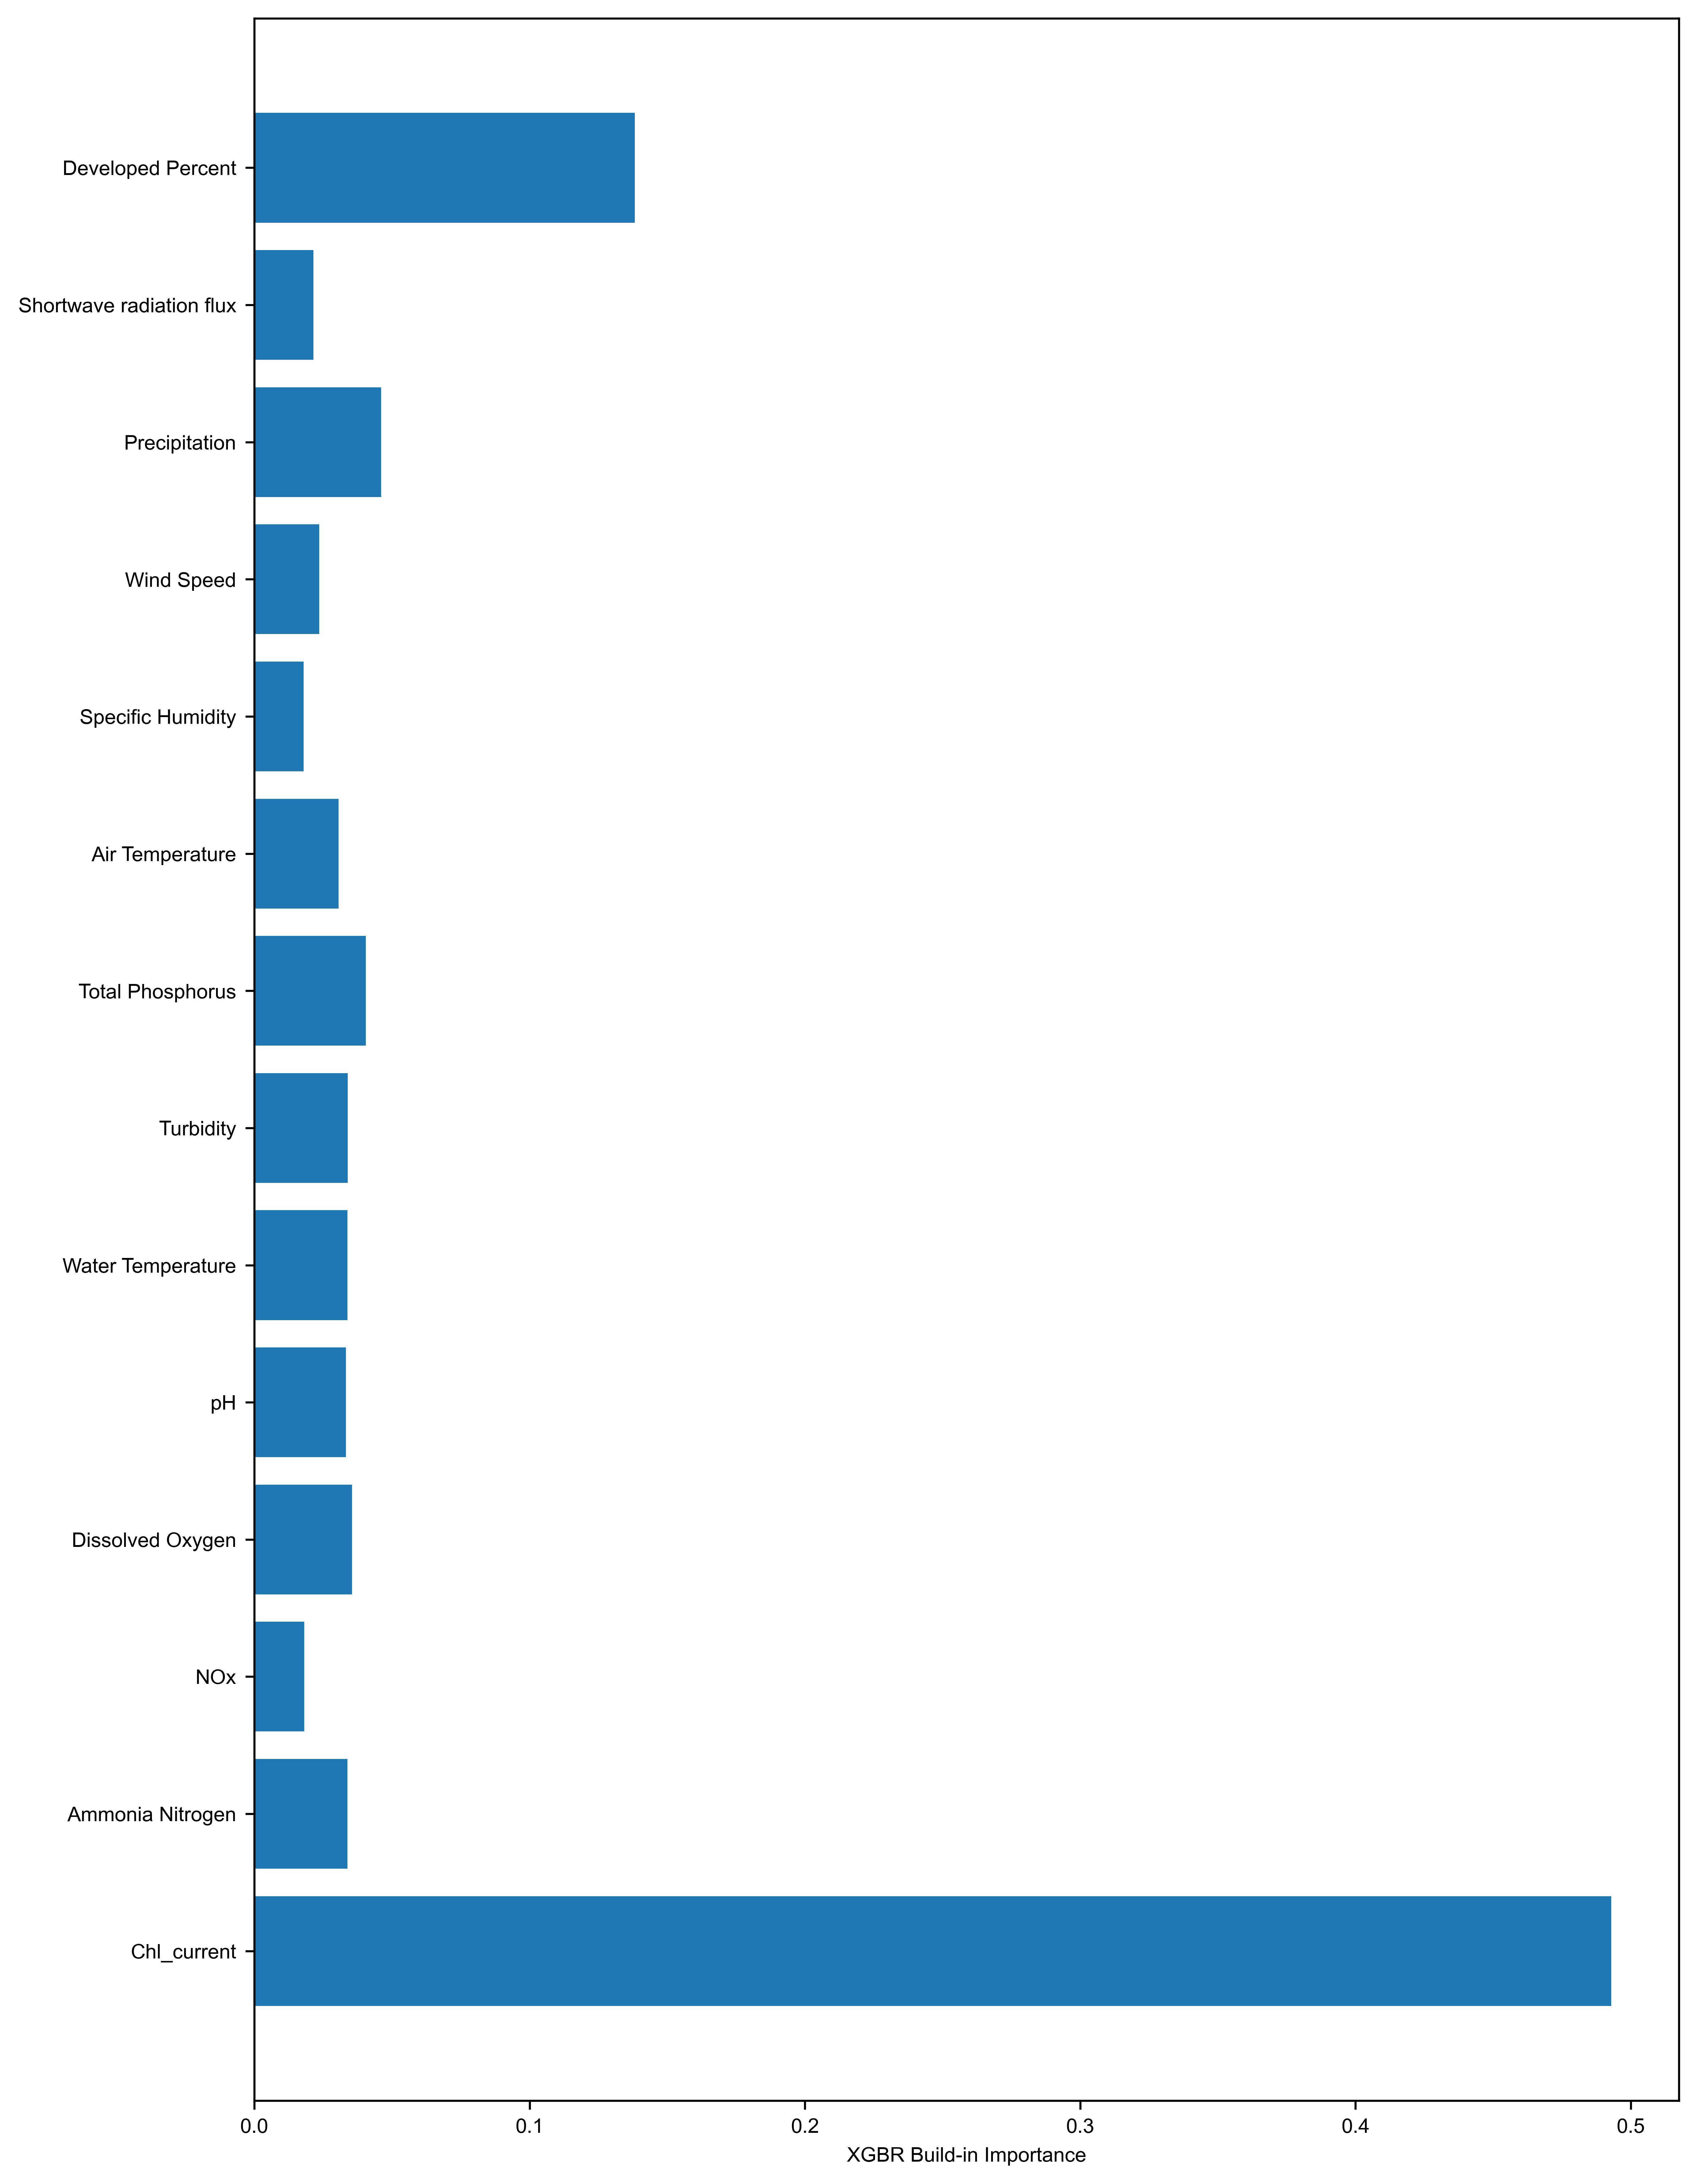

In [301]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = XGBR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('XGBR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

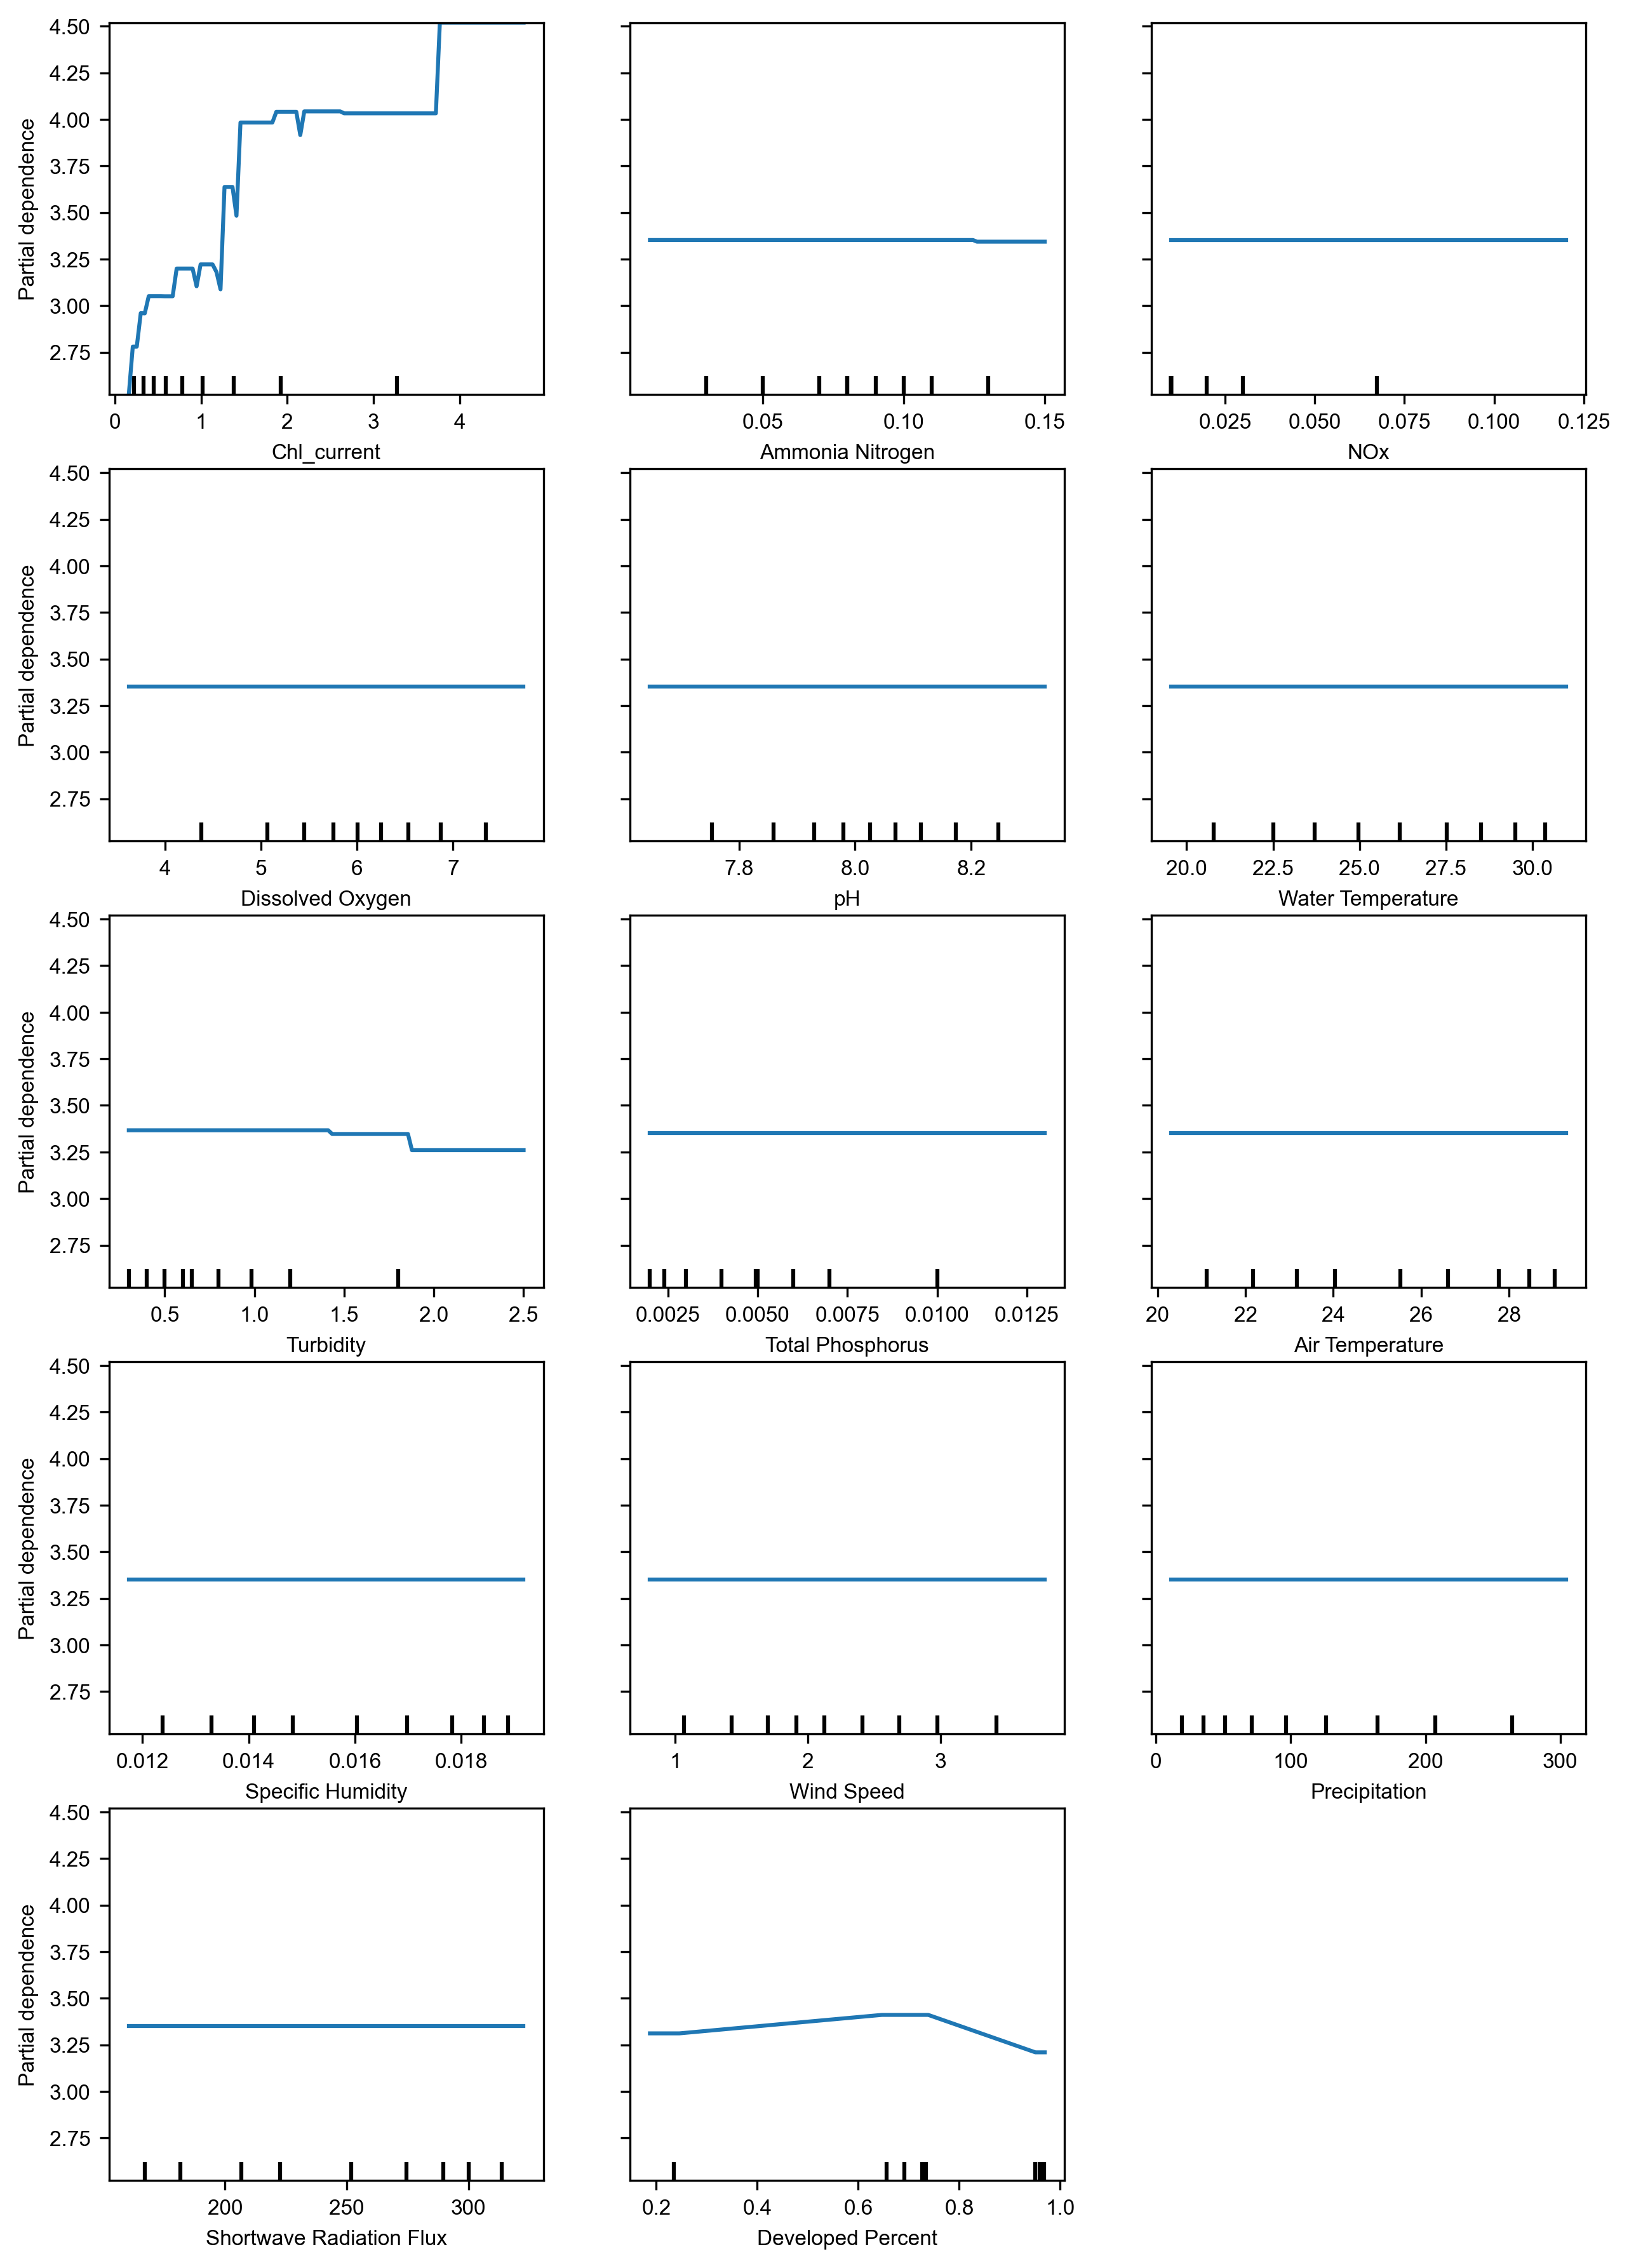

In [261]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(XGBR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

[0.4464462  0.00861872 0.00113403 0.00462972 0.003441   0.05878815
 0.01091259 0.0046429  0.00381122 0.00488981 0.00750884 0.02806564
 0.01004287 0.04111418]


Text(0.5, 0, 'XGBR Permutation Importance')

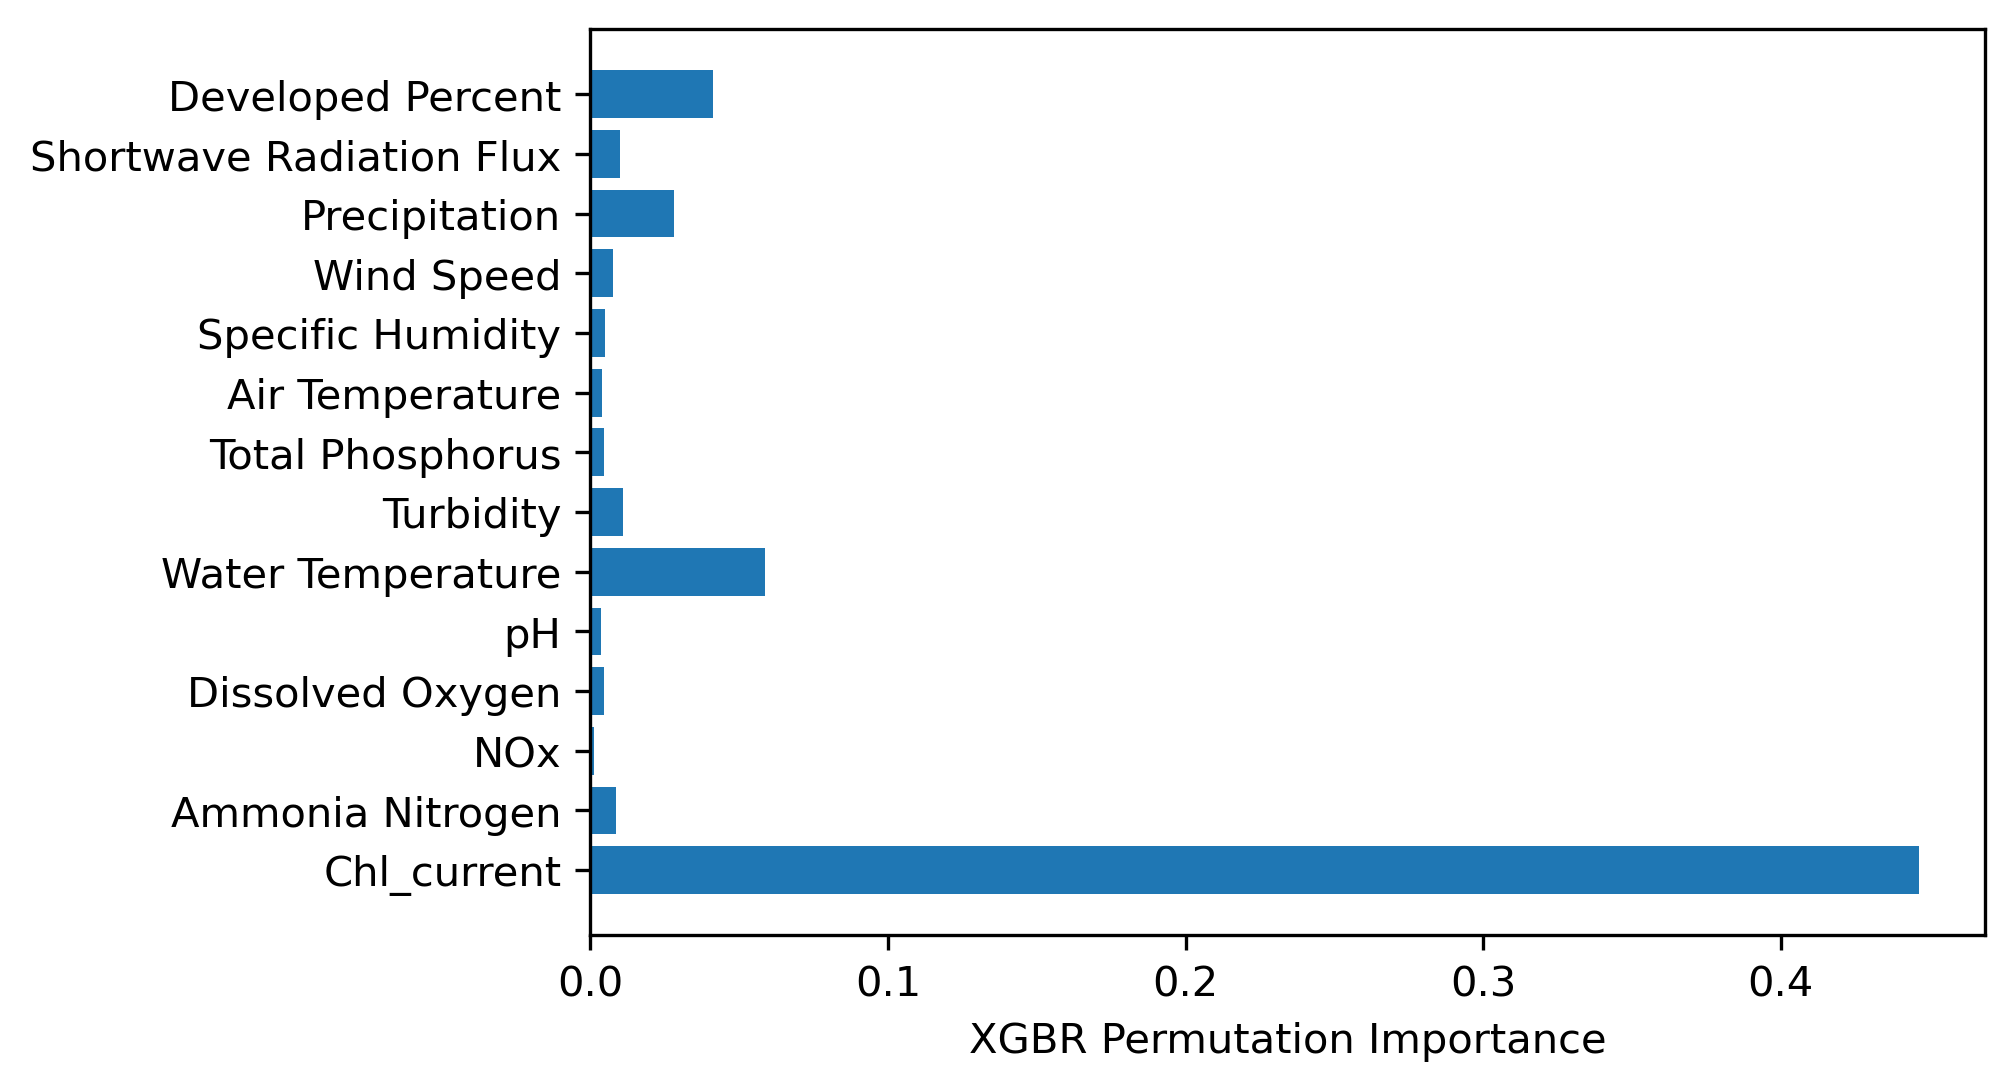

In [9]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(XGBR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("XGBR Permutation Importance")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


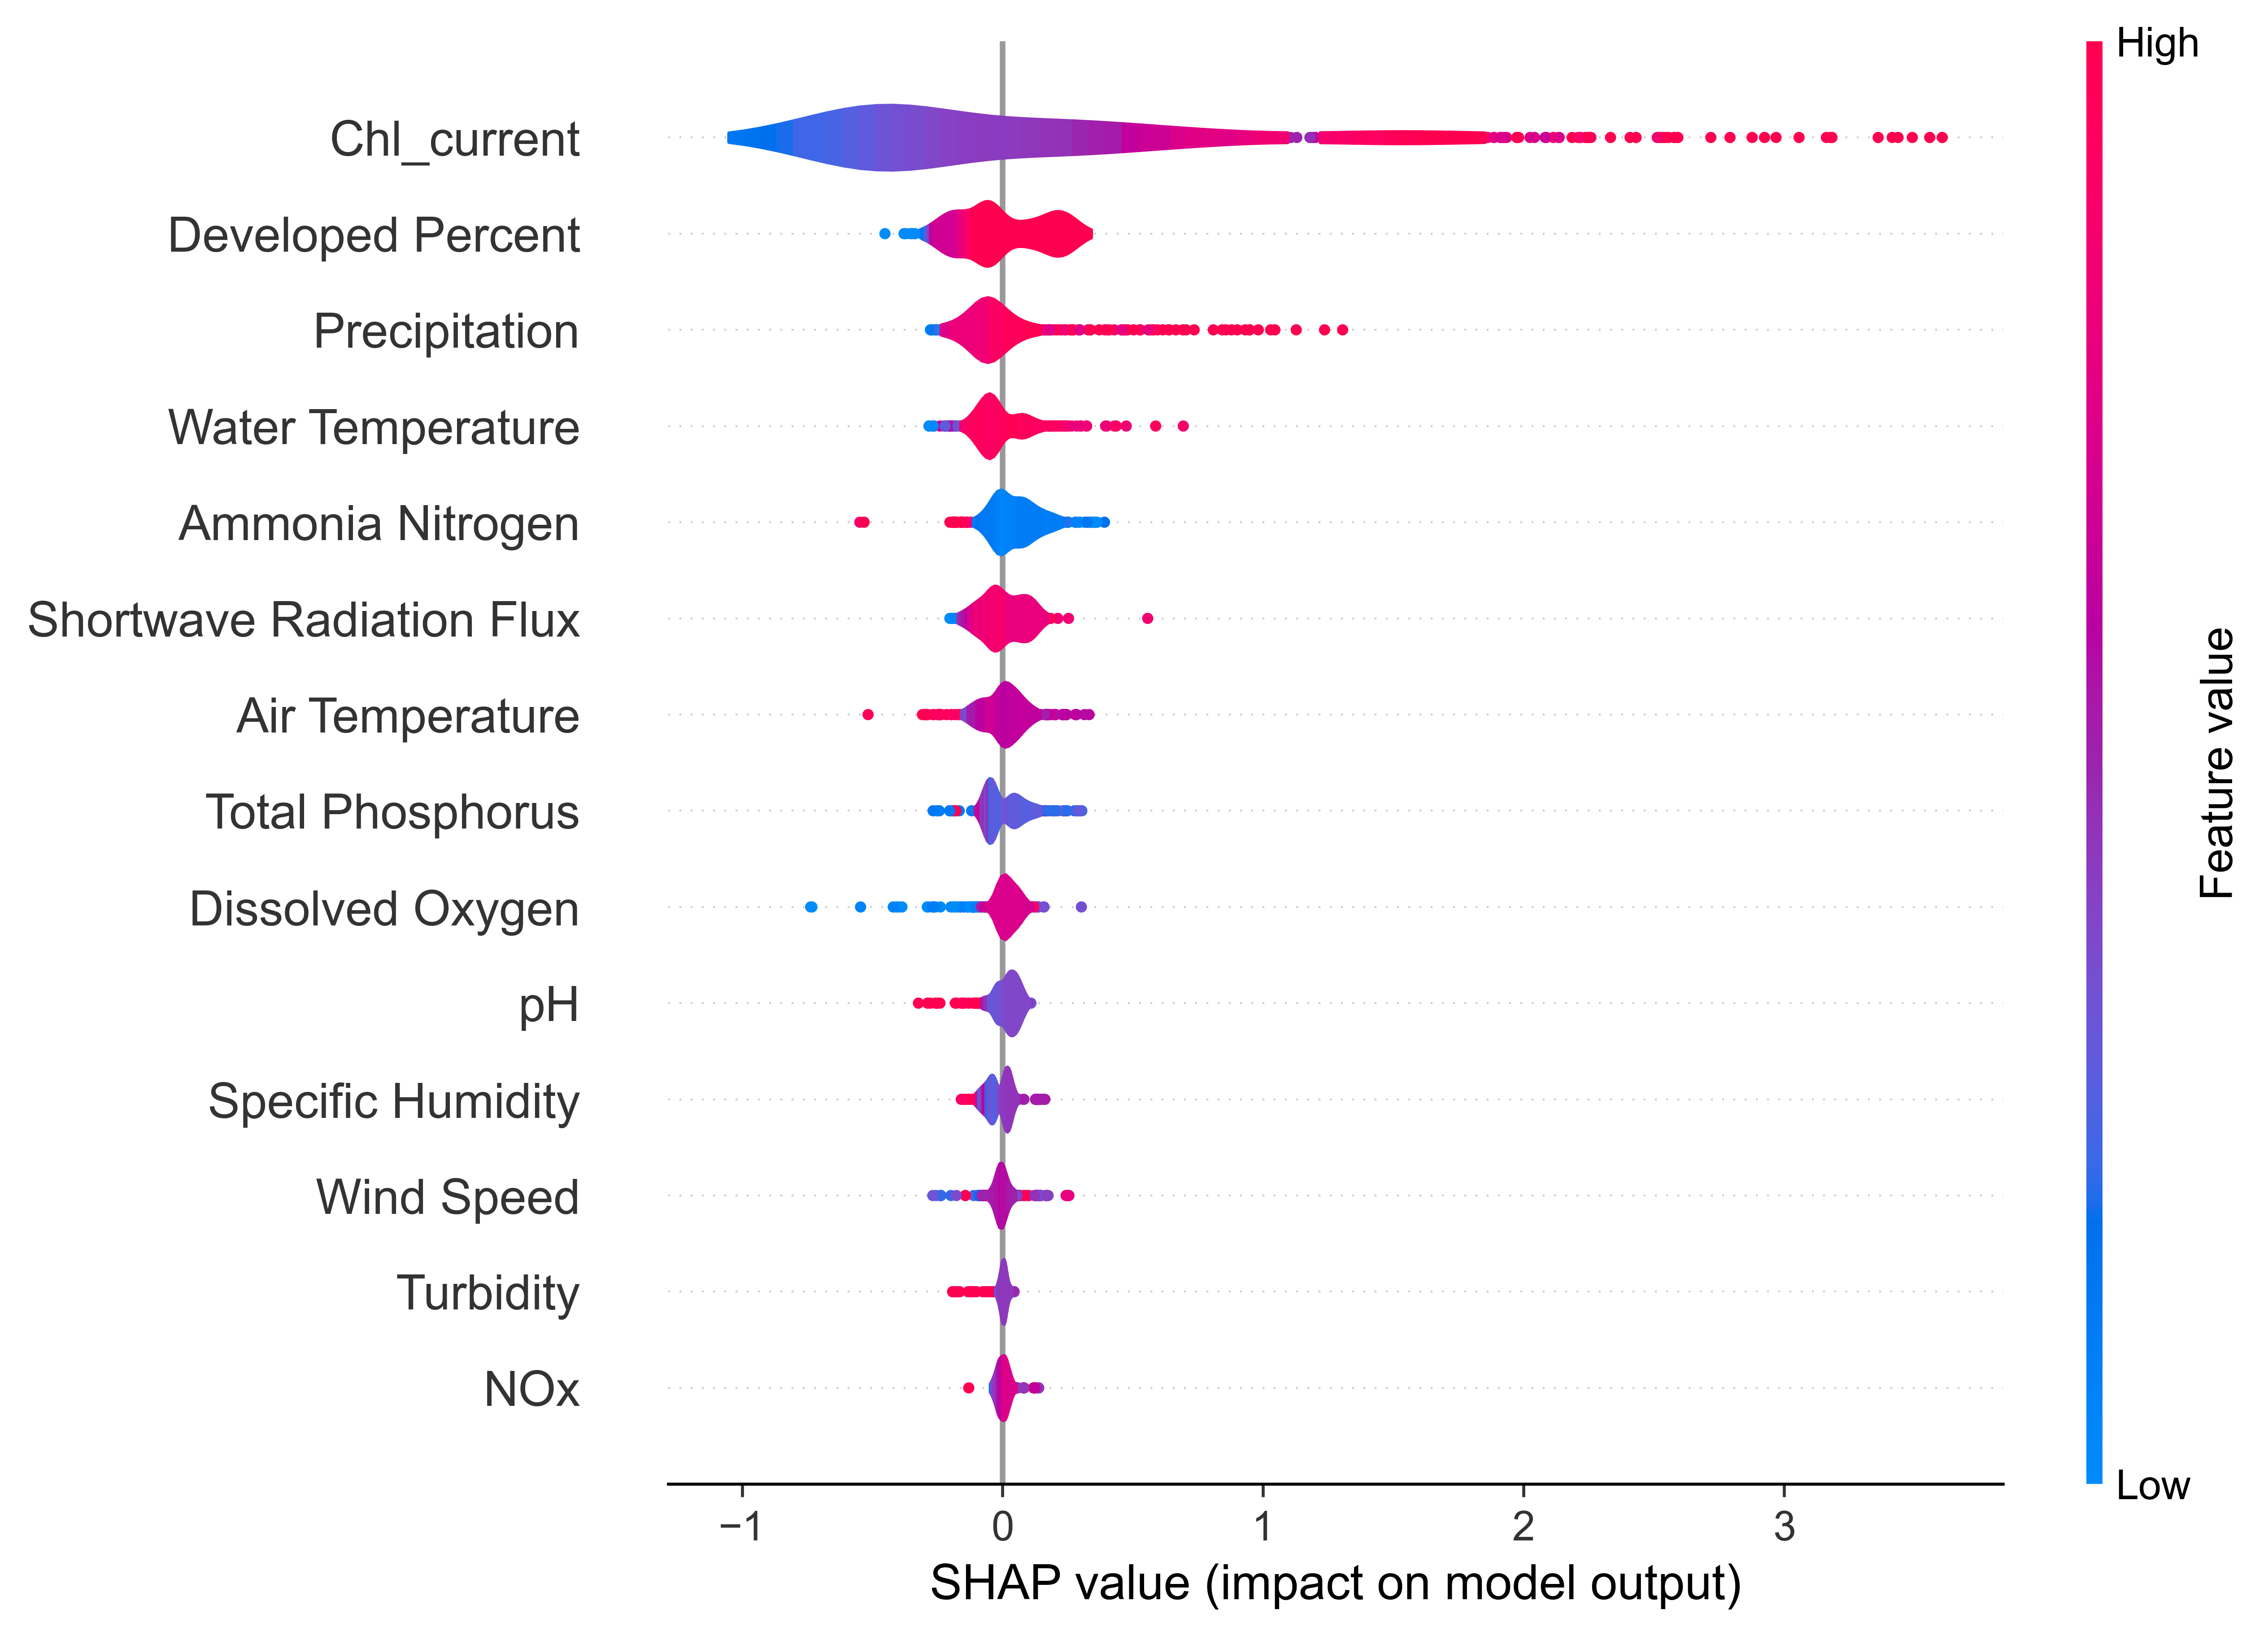

In [285]:
import shap
explainer = shap.TreeExplainer(XGBR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [286]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
0,Chl_current,0.668125
13,Developed Percent,0.145507
11,Precipitation,0.120407
5,Water Temperature,0.082455
1,Ammonia Nitrogen,0.079601
12,Shortwave Radiation Flux,0.07003
8,Air Temperature,0.064363
7,Total Phosphorus,0.064009
3,Dissolved Oxygen,0.043367
4,pH,0.042308


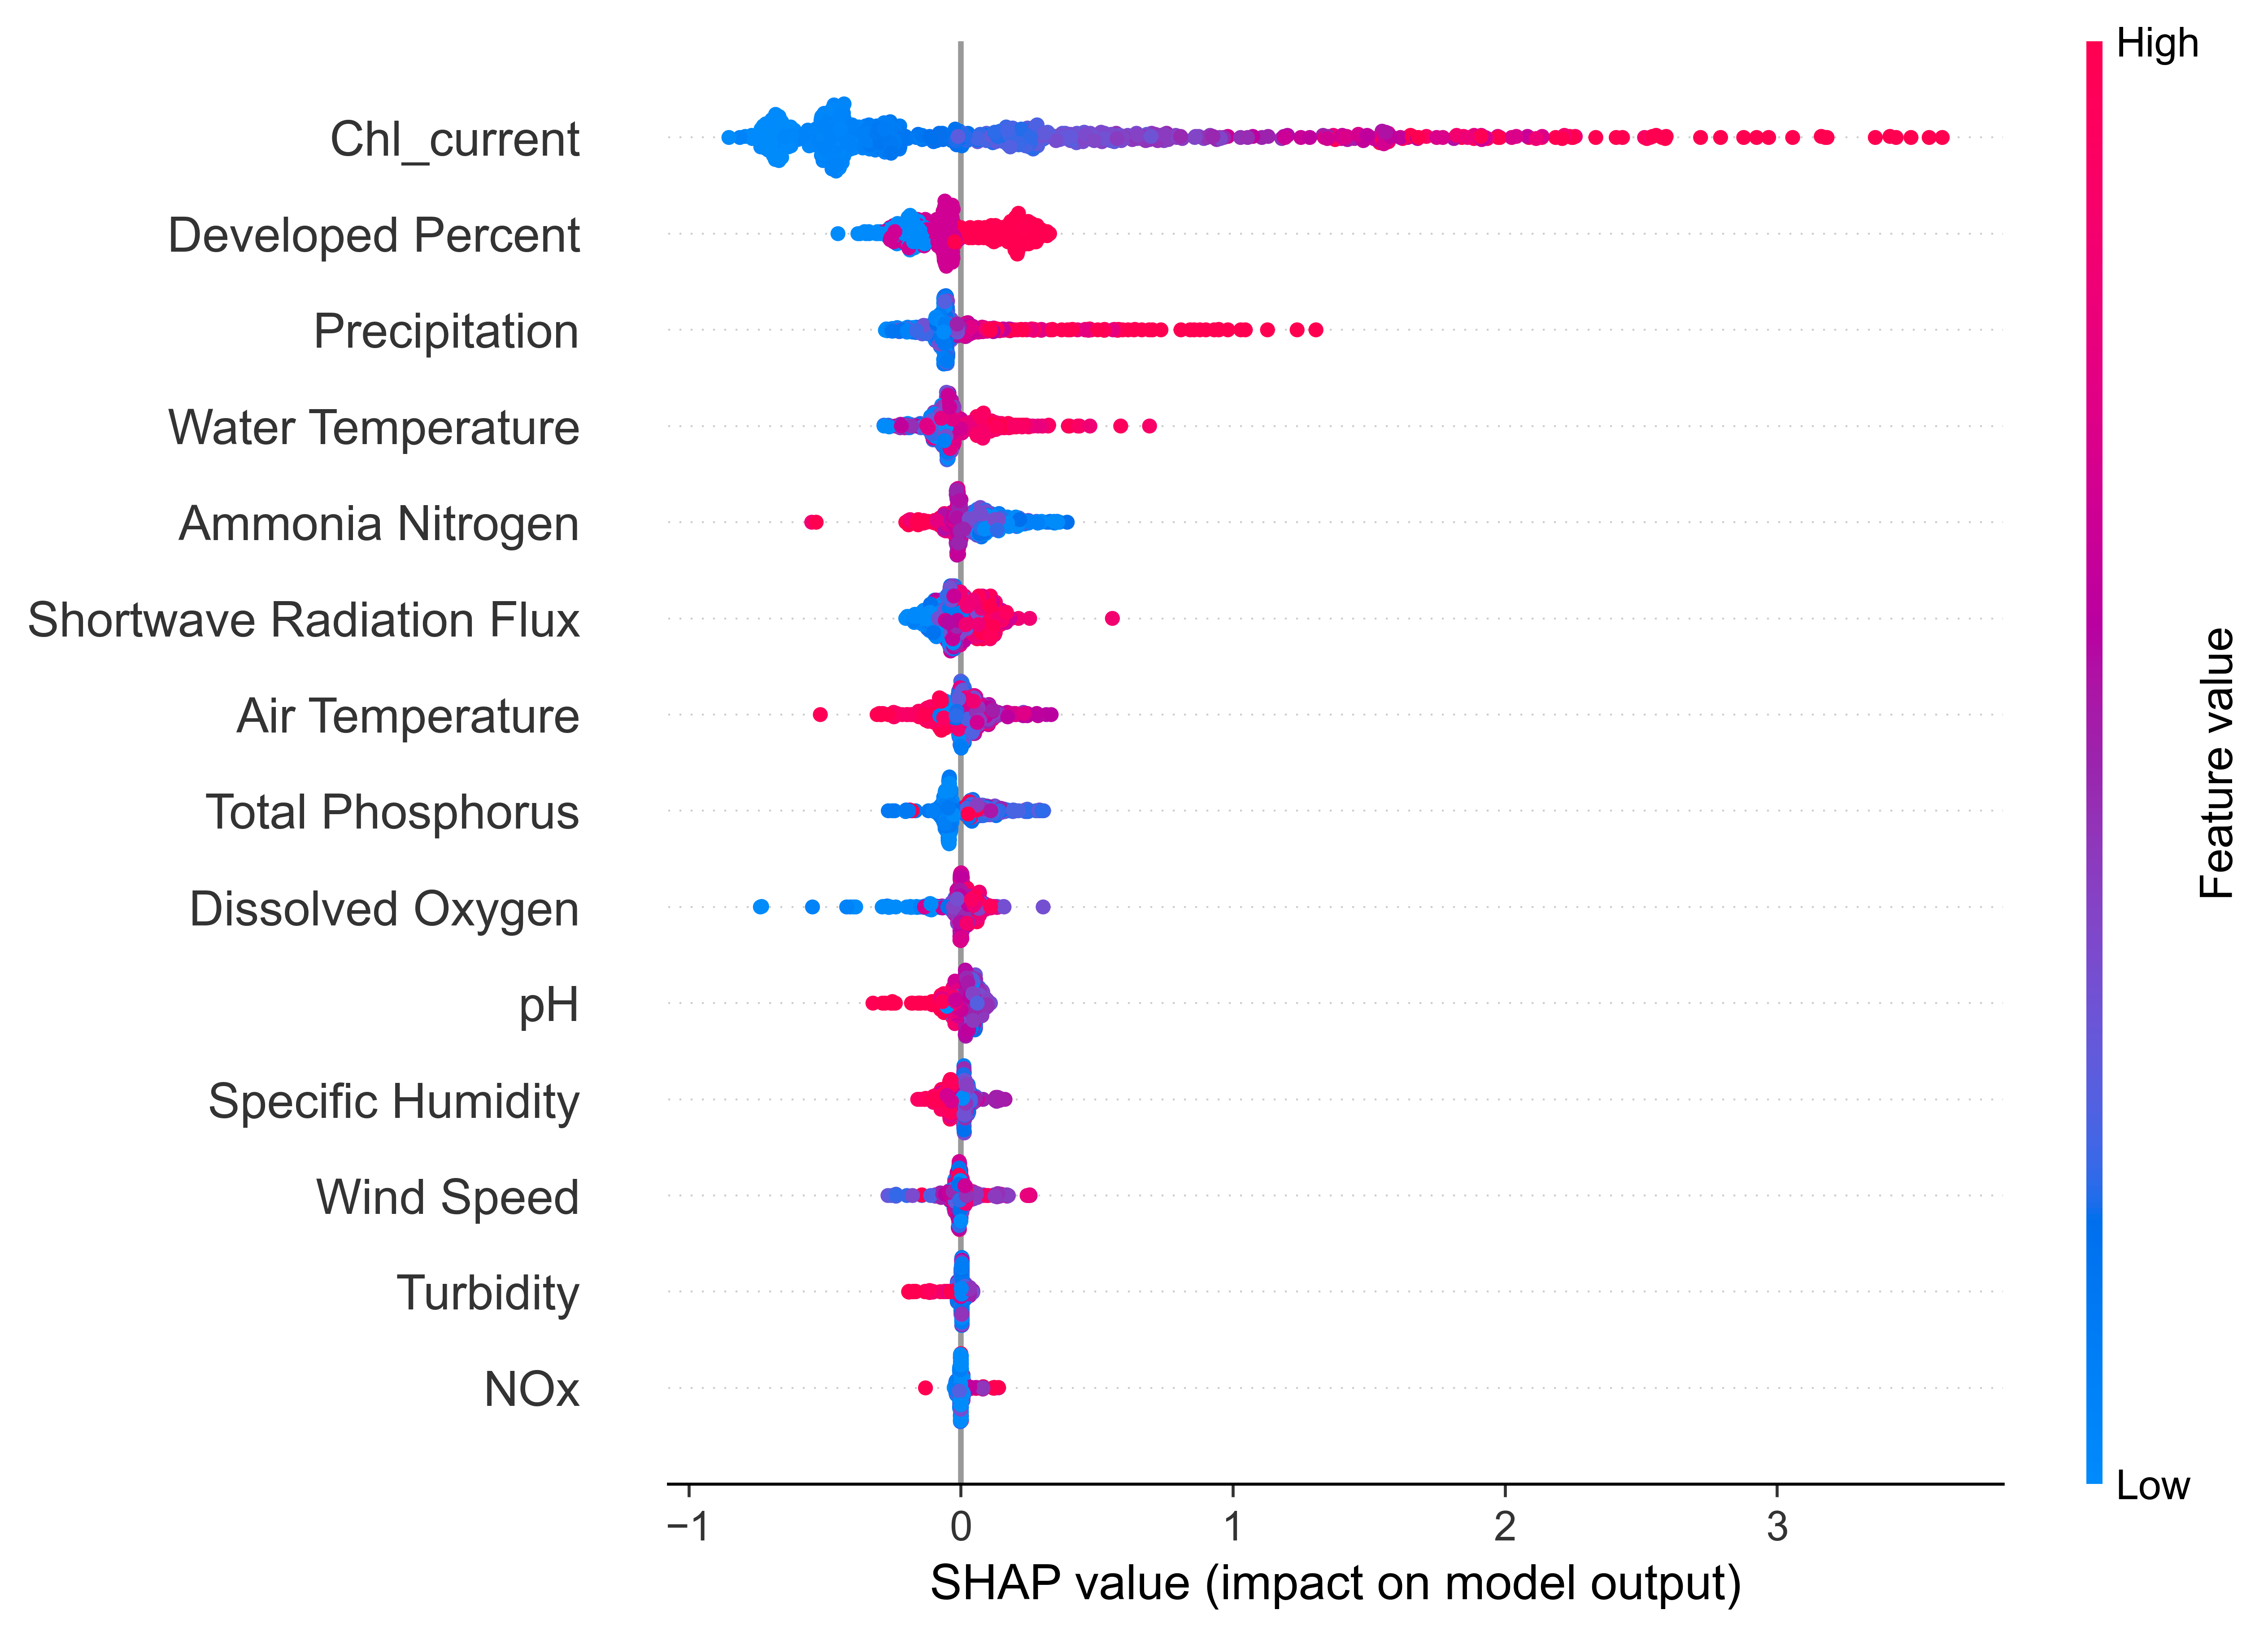

In [287]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [333]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [334]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,2.357383
1,2.860000,2.769581
2,3.692863,2.773937
3,5.130000,3.069649
4,3.646510,2.612011
...,...,...
2731,0.860000,1.117546
2732,0.460000,0.703228
2733,0.540000,0.557074
2734,0.210000,0.529078


In [335]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [336]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_1m_lag,Predicted Chlorophyll-a
2736,6.830000,3.083457
2737,4.349878,3.047787
2738,2.740000,2.949974
2739,2.210000,3.522271
2740,3.870000,2.721650
...,...,...
3451,0.480000,0.701457
3452,0.630000,0.563147
3453,0.930000,0.539802
3454,0.650000,0.713952


In [337]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_1m_lag,Predicted Chlorophyll-a
0,3.759632,2.357383
1,2.860000,2.769581
2,3.692863,2.773937
3,5.130000,3.069649
4,3.646510,2.612011
...,...,...
3451,0.480000,0.701457
3452,0.630000,0.563147
3453,0.930000,0.539802
3454,0.650000,0.713952


In [338]:
All_Y.loc[0]

Chl_1m_lag                 3.759632
Predicted Chlorophyll-a    2.357383
Name: 0, dtype: float64

In [248]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [339]:
import os
import joblib
joblib.dump(XGBR, "./XGBR_lag.joblib")

['./XGBR_lag.joblib']

In [340]:
import os
import joblib
loaded_xgbr = joblib.load("./XGBR_lag.joblib")

In [341]:
# original
aaaa = loaded_xgbr.predict(x)

In [342]:
aaaa

array([2.3573835 , 2.769581  , 2.773937  , ..., 0.5398019 , 0.71395206,
       0.50070024], dtype=float32)

In [343]:
len(aaaa)

3456